In [ ]:
pip install netCDF4 xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.2 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import pandas as pd

# Load the NetCDF file
file_path = "/content/cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_1743284598423.nc"  # Replace with your actual NetCDF file path
ds = xr.open_dataset(file_path)

# Convert the dataset to a Pandas DataFrame
df = ds.to_dataframe().reset_index()

# Export the DataFrame to a CSV file
output_csv = "IndianOceanOutput.csv"
df.to_csv(output_csv, index=False)

In [3]:
from netCDF4 import Dataset

# Open the NetCDF file
file_path = '/content/cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_1743284598423.nc'
dataset = Dataset(file_path, 'r')  # 'r' stands for read-only mode


In [4]:
# Iterate over all variables in the dataset
for var_name, variable in dataset.variables.items():
    print(f"Variable: {var_name}")
    print(f"    Dimensions: {variable.dimensions}")
    print(f"    Shape: {variable.shape}\n")


Variable: time
    Dimensions: ('time',)
    Shape: (11,)

Variable: depth
    Dimensions: ('depth',)
    Shape: (1,)

Variable: latitude
    Dimensions: ('latitude',)
    Shape: (719,)

Variable: longitude
    Dimensions: ('longitude',)
    Shape: (1110,)

Variable: uo
    Dimensions: ('time', 'depth', 'latitude', 'longitude')
    Shape: (11, 1, 719, 1110)

Variable: vo
    Dimensions: ('time', 'depth', 'latitude', 'longitude')
    Shape: (11, 1, 719, 1110)



In [5]:
# Iterate over all dimensions in the dataset
for dim_name, dimension in dataset.dimensions.items():
    print(f"Dimension: {dim_name}, Size: {len(dimension)}")


Dimension: time, Size: 11
Dimension: depth, Size: 1
Dimension: latitude, Size: 719
Dimension: longitude, Size: 1110


In [7]:
# Retrieve global attributes
global_attrs = {attr: dataset.getncattr(attr) for attr in dataset.ncattrs()}
print(global_attrs)


{'Conventions': 'CF-1.11', 'title': 'daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily', 'institution': 'Mercator Ocean International', 'producer': 'CMEMS - Global Monitoring and Forecasting Centre', 'source': 'MOI GLO12', 'credit': 'E.U. Copernicus Marine Service Information (CMEMS)', 'contact': 'https://marine.copernicus.eu/contact', 'references': 'http://marine.copernicus.eu', 'subset:source': 'ARCO data downloaded from the Marine Data Store using the MyOcean Data Portal', 'subset:productId': 'GLOBAL_ANALYSISFORECAST_PHY_001_024', 'subset:datasetId': 'cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_202406', 'subset:date': '2025-03-29T21:43:18.424Z'}


In [8]:
df = ds.to_dataframe().reset_index()

# Display the first 10 rows
print(df.head(10))


        time     depth  latitude  longitude        uo        vo
0 2025-03-20  0.494025     -20.5  34.833347  0.024609  0.011416
1 2025-03-20  0.494025     -20.5  34.916679  0.024460  0.147396
2 2025-03-20  0.494025     -20.5  35.000011  0.027780  0.333961
3 2025-03-20  0.494025     -20.5  35.083347  0.004486  0.516544
4 2025-03-20  0.494025     -20.5  35.166679 -0.105920  0.392447
5 2025-03-20  0.494025     -20.5  35.250011 -0.155722  0.083202
6 2025-03-20  0.494025     -20.5  35.333347 -0.085090  0.154147
7 2025-03-20  0.494025     -20.5  35.416679 -0.071622  0.088660
8 2025-03-20  0.494025     -20.5  35.500011 -0.087852  0.087592
9 2025-03-20  0.494025     -20.5  35.583347 -0.102286  0.045256


In [10]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 44.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


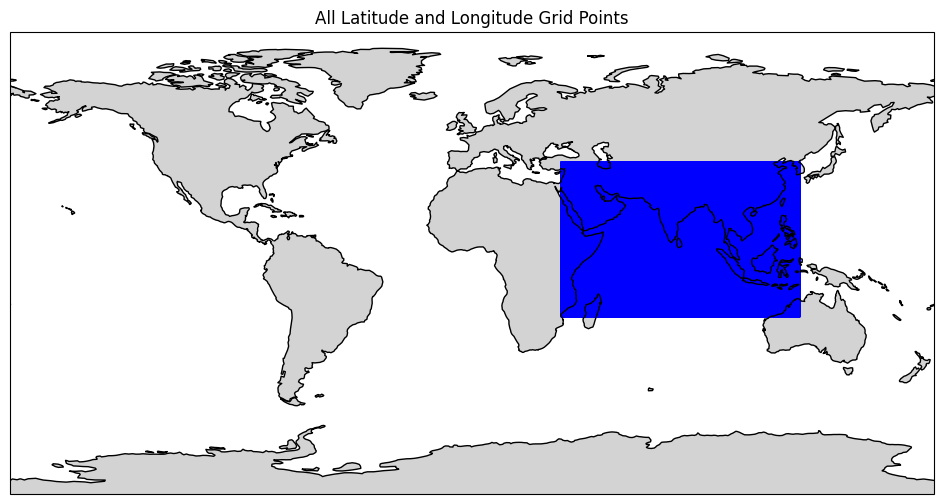

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the NetCDF file
file_path = "/content/cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_1743284598423.nc"  # Replace with your file path
ds = xr.open_dataset(file_path)

# Extract latitude and longitude values
# Assuming they are 1D coordinate arrays; adjust names if necessary.
latitudes = ds['latitude'].values
longitudes = ds['longitude'].values

# Create a meshgrid to get the complete set of grid points
LON, LAT = np.meshgrid(longitudes, latitudes)

# Create a figure with a global PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features for context
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

# Plot all grid points on the map
ax.scatter(LON, LAT, s=1, color='blue', transform=ccrs.PlateCarree())

plt.title("All Latitude and Longitude Grid Points")
plt.show()


Shape of LON: (719, 1110)
Shape of uo_2d: (719, 1110)


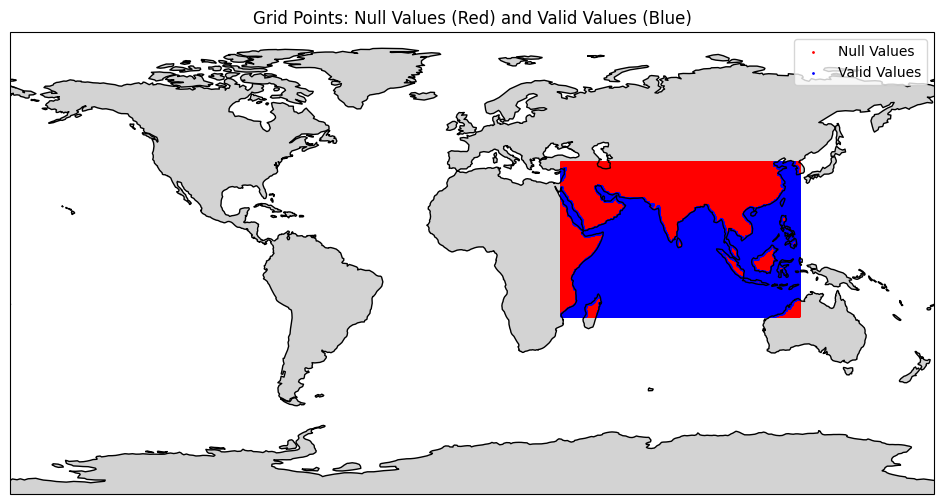

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open the NetCDF file
file_path = "/content/cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_1743284598423.nc"  # Replace with your file path
ds = xr.open_dataset(file_path)

# Extract latitude and longitude values (assuming these are 1D coordinate arrays)
lats = ds['latitude'].values
lons = ds['longitude'].values

# Extract the variable 'uo' and squeeze to remove extra dimensions.
# If there's a time dimension, select the first time slice.
uo_raw = ds['uo']
uo_squeezed = uo_raw.squeeze()  # Remove dimensions of size 1
if uo_squeezed.ndim > 2:
    # If still more than 2 dimensions, assume time is the first dimension and select the first slice.
    uo_2d = uo_squeezed.isel(time=0).values
else:
    uo_2d = uo_squeezed.values

# Create a mask for null values in the uo variable
mask = np.isnan(uo_2d)

# Create a meshgrid for coordinates (all grid points)
LON, LAT = np.meshgrid(lons, lats)

# Verify that shapes match
print("Shape of LON:", LON.shape)
print("Shape of uo_2d:", uo_2d.shape)

# Create a figure with a global PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features for context
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

# Plot points: red for null values, blue for valid values
ax.scatter(LON[mask], LAT[mask], s=1, color='red', transform=ccrs.PlateCarree(), label='Null Values')
ax.scatter(LON[~mask], LAT[~mask], s=1, color='blue', transform=ccrs.PlateCarree(), label='Valid Values')

# Add legend and title
plt.legend()
plt.title("Grid Points: Null Values (Red) and Valid Values (Blue)")
plt.show()


In [18]:
import pandas as pd

# Load your CSV file (replace with your actual file path)
df = pd.read_csv("/content/IndianOceanOutput.csv")

# Replace any empty strings (or strings with only whitespace) with NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Drop all rows that contain any NaN values
df_clean = df.dropna()

# Save the cleaned DataFrame to a new CSV file
df_clean.to_csv("cleaned_file.csv", index=False)

print("Cleaned CSV saved as 'cleaned_file.csv'")


Cleaned CSV saved as 'cleaned_file.csv'


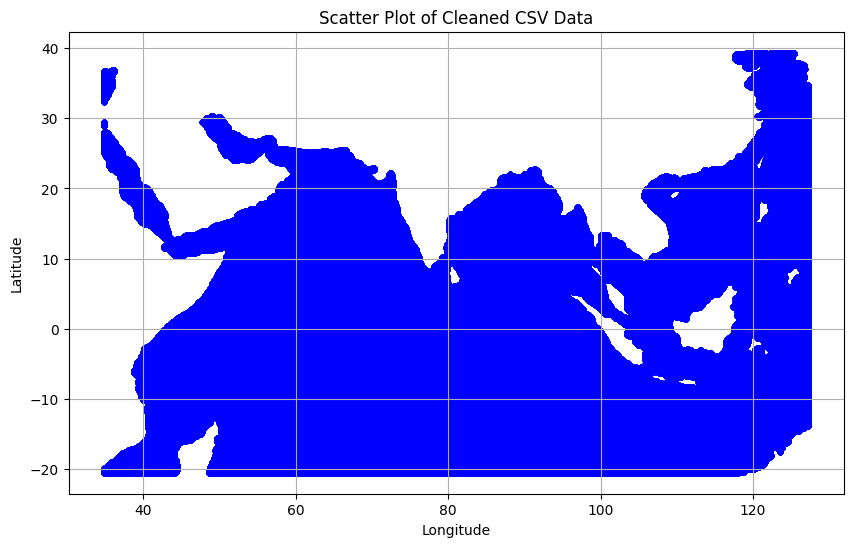

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
df_clean = pd.read_csv("cleaned_file.csv")  # Replace with your cleaned CSV file path

# Extract latitude and longitude columns
lats = df_clean['latitude']
lons = df_clean['longitude']

# Create a scatter plot of the cleaned data points
plt.figure(figsize=(10, 6))
plt.scatter(lons, lats, s=10, color='blue', alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Cleaned CSV Data")
plt.grid(True)
plt.show()


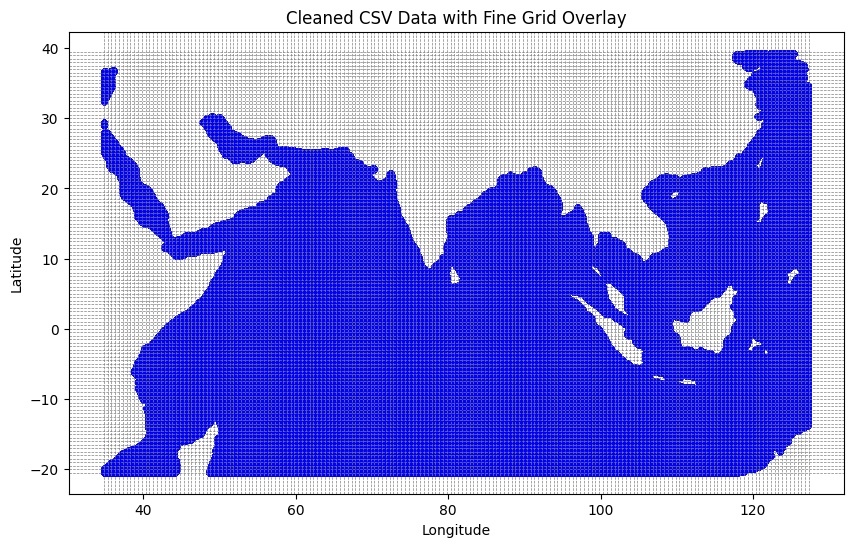

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_file.csv")


lats = df['latitude']
lons = df['longitude']


grid_step = 0.5

lon_min, lon_max = lons.min(), lons.max()
lat_min, lat_max = lats.min(), lats.max()

lon_lines = np.arange(lon_min, lon_max + grid_step, grid_step)
lat_lines = np.arange(lat_min, lat_max + grid_step, grid_step)

fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(lons, lats, s=10, color='blue', alpha=0.7)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Cleaned CSV Data with Fine Grid Overlay")

for x in lon_lines:
    ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

for y in lat_lines:
    ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)


def get_grid_cell(x, y, step):

    x_low = np.floor(x / step) * step
    x_high = x_low + step
    y_low = np.floor(y / step) * step
    y_high = y_low + step
    return x_low, x_high, y_low, y_high

def on_click(event):
    if event.inaxes != ax:
        return
    click_lon, click_lat = event.xdata, event.ydata
    x_low, x_high, y_low, y_high = get_grid_cell(click_lon, click_lat, grid_step)
    print(f"\nClicked at (lon: {click_lon:.3f}, lat: {click_lat:.3f}).")
    print(f"Grid cell bounds: lon: [{x_low:.3f}, {x_high:.3f}], lat: [{y_low:.3f}, {y_high:.3f}]")

    mask = (
        (df['longitude'] >= x_low) & (df['longitude'] < x_high) &
        (df['latitude'] >= y_low) & (df['latitude'] < y_high)
    )
    cell_data = df[mask]
    if cell_data.empty:
        print("No data points in this cell.")
    else:
        print("Data points in this cell:")
        print(cell_data)

    for coll in ax.collections[1:]:
        coll.remove()
    rect = plt.Rectangle((x_low, y_low), grid_step, grid_step,
                         fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()


Vizag grid index (i,j): (np.int64(458), np.int64(580))
Jakarta grid index (i,j): (np.int64(173), np.int64(864))
Computed path (node ids): [np.int64(508960), 507851, 506742, 505633, 504524, 503415, 502306, 501197, 500088, 498979, 497870, 496761, 495652, 494543, 493434, 492325, 491216, 490107, 488998, 487889, 486780, 485671, 484562, 483453, 482344, 481235, 480126, 479017, 477908, 476799, 475690, 474581, 473472, 472363, 471254, 470145, 469036, 467927, 466818, 465709, 464600, 463491, 462382, 461273, 460164, 459055, 457946, 456837, 455728, 454619, 453510, 452401, 451292, 450183, 449074, 447965, 446856, 445747, 444638, 443529, 442420, 441311, 440202, 439093, 437984, 436875, 435766, 434657, 433548, 432439, 431330, 430221, 429112, 428003, 426894, 425785, 424676, 423567, 422458, 421349, 420240, 419131, 418022, 416913, 415804, 414695, 413586, 412477, 411368, 410259, 409150, 408041, 406932, 405823, 404714, 403605, 402496, 401387, 400278, 399169, 398060, 396951, 395842, 394733, 393624, 392515, 391

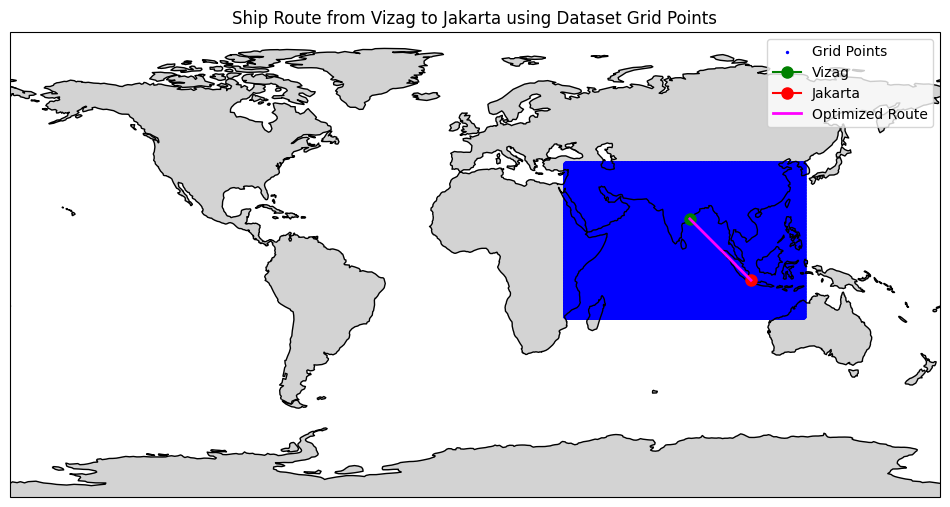

In [24]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import radians, sin, cos, sqrt, asin

def haversine(lon1, lat1, lon2, lat2):
    # convert degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Earth's radius in km.
    return c * r

df = pd.read_csv("cleaned_file.csv")

unique_lats = np.sort(df['latitude'].unique())
unique_lons = np.sort(df['longitude'].unique())

LON, LAT = np.meshgrid(unique_lons, unique_lats)
grid_lons = LON.ravel()
grid_lats = LAT.ravel()


vizag_coord   = (17.7, 83.2)    # Vizag (Visakhapatnam, India)
jakarta_coord = (-6.1, 106.8)   # Jakarta (Tanjung Priok, Indonesia)

def find_nearest_grid_index(unique_lats, unique_lons, target):
    i = np.argmin(np.abs(unique_lats - target[0]))
    j = np.argmin(np.abs(unique_lons - target[1]))
    return i, j

vizag_idx = find_nearest_grid_index(unique_lats, unique_lons, vizag_coord)
jakarta_idx = find_nearest_grid_index(unique_lats, unique_lons, jakarta_coord)
print("Vizag grid index (i,j):", vizag_idx)
print("Jakarta grid index (i,j):", jakarta_idx)


n_lat = len(unique_lats)
n_lon = len(unique_lons)
G = nx.Graph()

for i in range(n_lat):
    for j in range(n_lon):
        node_id = i * n_lon + j
        G.add_node(node_id, latitude=unique_lats[i], longitude=unique_lons[j])

neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1),
             (-1, -1), (-1, 1), (1, -1), (1, 1)]

for i in range(n_lat):
    for j in range(n_lon):
        current_node = i * n_lon + j
        for di, dj in neighbors:
            ni, nj = i + di, j + dj
            if 0 <= ni < n_lat and 0 <= nj < n_lon:
                neighbor_node = ni * n_lon + nj
                lat1, lon1 = unique_lats[i], unique_lons[j]
                lat2, lon2 = unique_lats[ni], unique_lons[nj]
                distance = haversine(lon1, lat1, lon2, lat2)
                G.add_edge(current_node, neighbor_node, weight=distance)
start_node = vizag_idx[0] * n_lon + vizag_idx[1]
end_node = jakarta_idx[0] * n_lon + jakarta_idx[1]

try:
    path_nodes = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')
    print("Computed path (node ids):", path_nodes)
except nx.NetworkXNoPath:
    print("No path found between Vizag and Jakarta.")
    path_nodes = []

path_lats = []
path_lons = []
for node in path_nodes:
    i = node // n_lon
    j = node % n_lon
    path_lats.append(unique_lats[i])
    path_lons.append(unique_lons[j])


fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

ax.scatter(grid_lons, grid_lats, s=2, color='blue', transform=ccrs.PlateCarree(), label="Grid Points")

ax.plot(vizag_coord[1], vizag_coord[0], marker='o', markersize=8, color='green',
        transform=ccrs.PlateCarree(), label="Vizag")
ax.plot(jakarta_coord[1], jakarta_coord[0], marker='o', markersize=8, color='red',
        transform=ccrs.PlateCarree(), label="Jakarta")
if path_nodes:
    ax.plot(path_lons, path_lats, color='magenta', linewidth=2, transform=ccrs.PlateCarree(), label="Optimized Route")

ax.set_title("Ship Route from Vizag to Jakarta using Dataset Grid Points")
ax.legend()
plt.show()


Total grid cells available: 466585
Unique latitudes count: 719
Unique longitudes count: 1110
Start grid index: (np.int64(458), np.int64(580))
Goal grid index: (np.int64(173), np.int64(864))
Optimized route (grid indices): [(np.int64(458), np.int64(580)), (np.int64(457), np.int64(581)), (np.int64(456), np.int64(582)), (np.int64(455), np.int64(583)), (np.int64(454), np.int64(584)), (np.int64(453), np.int64(585)), (np.int64(452), np.int64(586)), (np.int64(451), np.int64(587)), (np.int64(450), np.int64(588)), (np.int64(449), np.int64(589)), (np.int64(448), np.int64(590)), (np.int64(447), np.int64(591)), (np.int64(446), np.int64(592)), (np.int64(445), np.int64(593)), (np.int64(444), np.int64(594)), (np.int64(443), np.int64(595)), (np.int64(442), np.int64(596)), (np.int64(441), np.int64(597)), (np.int64(440), np.int64(598)), (np.int64(439), np.int64(599)), (np.int64(438), np.int64(600)), (np.int64(437), np.int64(601)), (np.int64(436), np.int64(602)), (np.int64(435), np.int64(603)), (np.int64

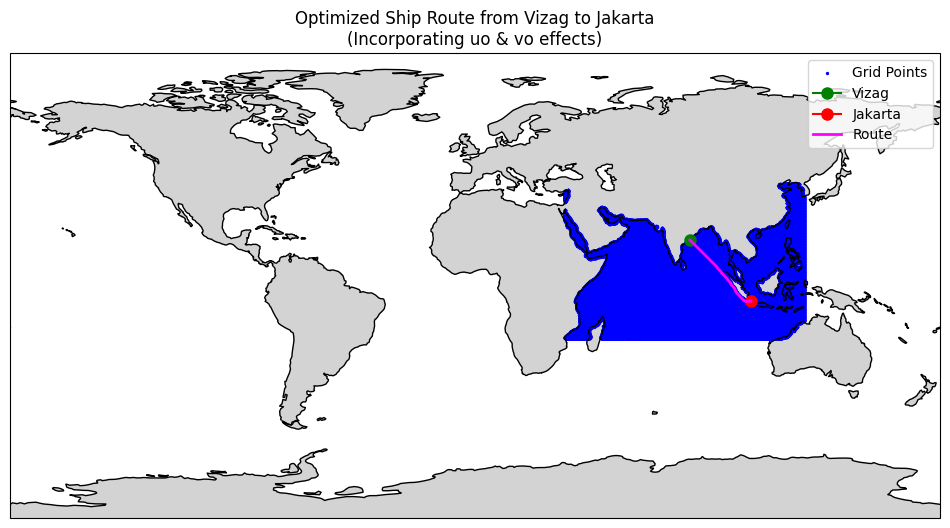

In [34]:
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import radians, sin, cos, sqrt, asin
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Earth's radius in km.
    return c * r

def snap_to_grid(lat, lon, keys):
    best_key = None
    best_diff = float('inf')
    for key in keys:
        diff = abs(key[0] - lat) + abs(key[1] - lon)
        if diff < best_diff:
            best_diff = diff
            best_key = key
    return best_key
# Heuristic-based search (A*-like) algorithm.
def heuristic_search(start, goal, neighbors_func, cost_func, heuristic_func):
    open_set = {start}
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_func(start, goal)}
    heap = [(f_score[start], start)]
    while heap:
        current = heapq.heappop(heap)[1]
        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1]
        if current in open_set:
            open_set.remove(current)
        for nbr in neighbors_func(current):
            tentative_g = g_score[current] + cost_func(current, nbr)
            if nbr not in g_score or tentative_g < g_score[nbr]:
                came_from[nbr] = current
                g_score[nbr] = tentative_g
                f_score[nbr] = tentative_g + heuristic_func(nbr, goal)
                if nbr not in open_set:
                    open_set.add(nbr)
                    heapq.heappush(heap, (f_score[nbr], nbr))
    return None

df = pd.read_csv("cleaned_file.csv")
grouped = df.groupby(['latitude', 'longitude'], as_index=False).agg({'uo': 'mean', 'vo': 'mean'})
grid_data = {(float(row['latitude']), float(row['longitude'])): {'uo': row['uo'], 'vo': row['vo']}
             for _, row in grouped.iterrows()}
print("Total grid cells available:", len(grid_data))

unique_lats = np.sort(grouped['latitude'].unique())
unique_lons = np.sort(grouped['longitude'].unique())
n_lat = len(unique_lats)
n_lon = len(unique_lons)
print("Unique latitudes count:", n_lat)
print("Unique longitudes count:", n_lon)

#define neighbor function (8-connected grid).
def get_neighbors(node):
    i, j = node
    nbrs = []
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0:
                continue
            ni, nj = i + di, j + dj
            if 0 <= ni < n_lat and 0 <= nj < n_lon:
                if (float(unique_lats[ni]), float(unique_lons[nj])) in grid_data:
                    nbrs.append((ni, nj))
    return nbrs
base_ship_speed = 20.0  # km/h
min_speed = 1.0         # km/h

def cost_func(node, nbr):
    i, j = node
    k, l = nbr
    lat1, lon1 = float(unique_lats[i]), float(unique_lons[j])
    lat2, lon2 = float(unique_lats[k]), float(unique_lons[l])
    d = haversine(lon1, lat1, lon2, lat2)
    key = snap_to_grid(lat1, lon1, grid_data.keys())
    current = np.array([grid_data[key]['uo'], grid_data[key]['vo']])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    norm = np.hypot(dlat, dlon)
    if norm == 0:
        return 0
    unit = np.array([dlon/norm, dlat/norm])
    proj = np.dot(current, unit)
    effective_speed = max(base_ship_speed + proj, min_speed)
    return d / effective_speed

def heuristic_func(node, goal):
    i, j = node
    k, l = goal
    lat1, lon1 = float(unique_lats[i]), float(unique_lons[j])
    lat2, lon2 = float(unique_lats[k]), float(unique_lons[l])
    return haversine(lon1, lat1, lon2, lat2)

def find_nearest_index(arr, target):
    return np.argmin(np.abs(arr - target))

vizag = (17.7, 83.2)      # (lat, lon) for Vizag
jakarta = (-6.1, 106.8)    # (lat, lon) for Jakarta
start = (find_nearest_index(unique_lats, vizag[0]), find_nearest_index(unique_lons, vizag[1]))
goal = (find_nearest_index(unique_lats, jakarta[0]), find_nearest_index(unique_lons, jakarta[1]))
print("Start grid index:", start)
print("Goal grid index:", goal)

route = heuristic_search(start, goal, get_neighbors, cost_func, heuristic_func)
print("Optimized route (grid indices):", route)

if route:
    route_lats = [float(unique_lats[i]) for i, j in route]
    route_lons = [float(unique_lons[j]) for i, j in route]
else:
    route_lats, route_lons = [], []
fig, ax = plt.subplots(figsize=(12,8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()
all_grid_lats = [lat for (lat, lon) in grid_data.keys()]
all_grid_lons = [lon for (lat, lon) in grid_data.keys()]
ax.scatter(all_grid_lons, all_grid_lats, s=2, color='blue', transform=ccrs.PlateCarree(), label="Grid Points")

ax.plot(vizag[1], vizag[0], marker='o', markersize=8, color='green', transform=ccrs.PlateCarree(), label="Vizag")
ax.plot(jakarta[1], jakarta[0], marker='o', markersize=8, color='red', transform=ccrs.PlateCarree(), label="Jakarta")

if route_lats and route_lons:
    ax.plot(route_lons, route_lats, color='magenta', linewidth=2, transform=ccrs.PlateCarree(), label="Route")

ax.set_title("Optimized Ship Route from Vizag to Jakarta\n(Incorporating uo & vo effects)")
ax.legend()
plt.show()


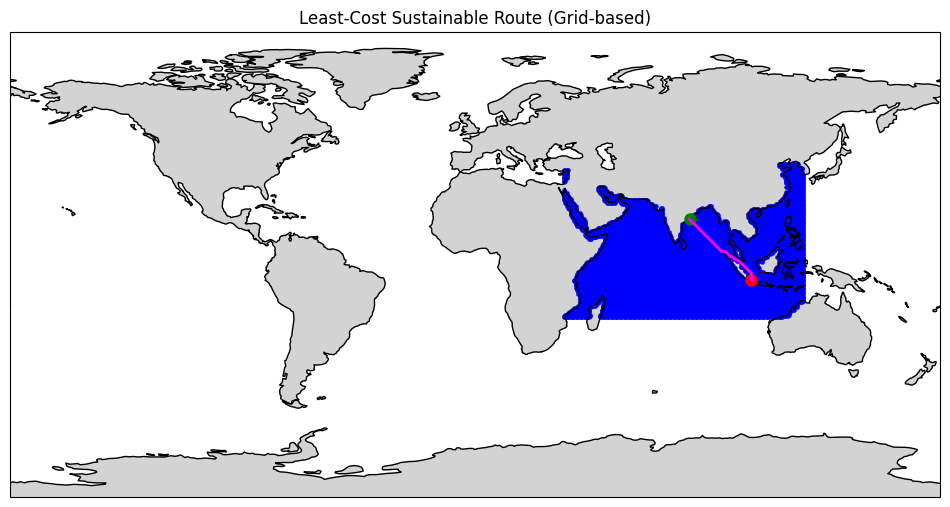

In [39]:
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import radians, sin, cos, sqrt, asin

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

grid_cell_size = 0.5
df = pd.read_csv("cleaned_file.csv")
df['grid_lat'] = (df['latitude'] // grid_cell_size) * grid_cell_size
df['grid_lon'] = (df['longitude'] // grid_cell_size) * grid_cell_size
grouped = df.groupby(['grid_lat', 'grid_lon']).agg({'uo': 'mean','vo': 'mean'}).reset_index()
grid_data = {(row['grid_lat'], row['grid_lon']): {'uo': row['uo'], 'vo': row['vo']} for _, row in grouped.iterrows()}

lats = sorted(set([k[0] for k in grid_data.keys()]))
lons = sorted(set([k[1] for k in grid_data.keys()]))

lat_to_index = {lat: i for i, lat in enumerate(lats)}
lon_to_index = {lon: j for j, lon in enumerate(lons)}

nodes = set((lat_to_index[k[0]], lon_to_index[k[1]]) for k in grid_data.keys())

def neighbors(node):
    i, j = node
    nbr = []
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di==0 and dj==0: continue
            n = (i+di, j+dj)
            if n in nodes:
                nbr.append(n)
    return nbr

base_speed = 20.0
min_speed = 1.0
def cost(node, nbr):
    lat1 = lats[node[0]]
    lon1 = lons[node[1]]
    lat2 = lats[nbr[0]]
    lon2 = lons[nbr[1]]
    d = haversine(lon1, lat1, lon2, lat2)
    current = np.array([grid_data[(lat1, lon1)]['uo'], grid_data[(lat1, lon1)]['vo']])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    norm = np.hypot(dlat, dlon)
    if norm == 0: return 0
    unit = np.array([dlon/norm, dlat/norm])
    proj = np.dot(current, unit)
    effective_speed = max(base_speed+proj, min_speed)
    return d/effective_speed

def heuristic(node, goal):
    lat1 = lats[node[0]]
    lon1 = lons[node[1]]
    lat2 = lats[goal[0]]
    lon2 = lons[goal[1]]
    return haversine(lon1, lat1, lon2, lat2)

def astar(start, goal):
    open_set = {start}
    came_from = {}
    g = {start: 0}
    f = {start: heuristic(start, goal)}
    heap = [(f[start], start)]
    while heap:
        current = heapq.heappop(heap)[1]
        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1]
        open_set.remove(current)
        for nbr in neighbors(current):
            tentative_g = g[current] + cost(current, nbr)
            if nbr not in g or tentative_g < g[nbr]:
                came_from[nbr] = current
                g[nbr] = tentative_g
                f[nbr] = tentative_g + heuristic(nbr, goal)
                if nbr not in open_set:
                    open_set.add(nbr)
                    heapq.heappush(heap, (f[nbr], nbr))
    return None

vizag = (17.7, 83.2)
jakarta = (-6.1, 106.8)
def find_nearest(target, arr):
    return min(arr, key=lambda x: abs(x-target))
grid_vizag = (find_nearest(vizag[0], lats), find_nearest(vizag[1], lons))
grid_jakarta = (find_nearest(jakarta[0], lats), find_nearest(jakarta[1], lons))
start = (lat_to_index[grid_vizag[0]], lon_to_index[grid_vizag[1]])
goal = (lat_to_index[grid_jakarta[0]], lon_to_index[grid_jakarta[1]])

route = astar(start, goal)
if route:
    route_lats = [lats[i] for i,j in route]
    route_lons = [lons[j] for i,j in route]
else:
    route_lats, route_lons = [], []

fig, ax = plt.subplots(figsize=(12,8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()
all_lats = [k[0] for k in grid_data.keys()]
all_lons = [k[1] for k in grid_data.keys()]
ax.scatter(all_lons, all_lats, s=5, color='blue', transform=ccrs.PlateCarree())
ax.plot(vizag[1], vizag[0], marker='o', markersize=8, color='green', transform=ccrs.PlateCarree())
ax.plot(jakarta[1], jakarta[0], marker='o', markersize=8, color='red', transform=ccrs.PlateCarree())
if route_lats and route_lons:
    ax.plot(route_lons, route_lats, color='magenta', linewidth=2, transform=ccrs.PlateCarree())
ax.set_title("Least-Cost Sustainable Route (Grid-based)")
plt.show()


In [42]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, asin

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

df = pd.read_csv("cleaned_file.csv")
grouped = df.groupby(["latitude", "longitude"], as_index=False).agg({"uo": "mean", "vo": "mean"})

base_ship_speed = 20.0
unique_lons = np.sort(df["longitude"].unique())
if len(unique_lons) > 1:
    grid_spacing = np.median(np.diff(unique_lons))
else:
    grid_spacing = 0.5

def cost_east(lat, lon, spacing):
    lon_east = lon + spacing
    d = haversine(lon, lat, lon_east, lat)
    row = grouped[(grouped["latitude"]==lat) & (grouped["longitude"]==lon)]
    if row.empty:
        return None, None, None, None
    uo = row.iloc[0]["uo"]
    v_eff = base_ship_speed + uo
    c = d / v_eff
    return c, spacing, d, v_eff

costs = []
for idx, row in grouped.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    c, sp, d, v_eff = cost_east(lat, lon, grid_spacing)
    costs.append(c)

grouped["cost_east"] = costs

print(grouped.head(20))


    latitude  longitude        uo        vo  cost_east
0      -20.5  34.833347  0.052378  0.010738   0.432847
1      -20.5  34.916680  0.059385  0.151394   0.432696
2      -20.5  35.000010 -0.004355  0.277648   0.434075
3      -20.5  35.083347 -0.110935  0.236349   0.436401
4      -20.5  35.166680 -0.160987  0.124540   0.437502
5      -20.5  35.250010 -0.125832 -0.025321   0.436728
6      -20.5  35.333347 -0.071757  0.063881   0.435543
7      -20.5  35.416680 -0.028630  0.128074   0.434602
8      -20.5  35.500010  0.014545  0.133346   0.433665
9      -20.5  35.583347  0.021907  0.088182   0.433505
10     -20.5  35.666680  0.005454  0.029517   0.433862
11     -20.5  35.750010 -0.014545 -0.027580   0.434296
12     -20.5  35.833347 -0.012763 -0.045228   0.434257
13     -20.5  35.916680  0.017132  0.018299   0.433609
14     -20.5  36.000010  0.052893  0.080824   0.432836
15     -20.5  36.083347  0.076870  0.119060   0.432319
16     -20.5  36.166680  0.083892  0.133508   0.432168
17     -20